In [101]:

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [102]:
# df = pd.read_csv('fixedTesting/predictionsBoth.csv')
df = pd.read_csv('predictionsNew.csv')
# df = df.drop(['taxa_obitos_covid',
#                 'taxa_atendimentos_dengue',
#                 'taxa_atendimentos_saude',
#                 'taxa_unidades_saude'], axis=1)
df




,Localidade,populacao_por_hectare,porcentagem_brancos,porcentagem_adultos,indiceEnvelhecimento,rendaMedianacRendimento,porcentagem_cobertura,taxa_obitos_covid,taxa_atendimentos_covid,preds
0,ABRANCHES,30.56,0.774433,0.710668,32.04,1000.000000,0.375862,439.760406,33444.537114,36835.077734
1,ÁGUA VERDE,107.74,0.911522,0.757355,92.35,2500.000000,0.169136,406.417112,26796.305299,34407.280785
2,AHÚ,62.03,0.916913,0.722666,92.58,1467.405405,0.199552,382.409178,28680.688337,34781.814675
3,ALTO BOQUEIRÃO,44.77,0.762386,0.721507,25.17,1000.000000,0.301180,452.758473,33133.349481,37088.694618
4,ALTO DA GLÓRIA,63.37,0.921593,0.750721,133.22,3000.000000,0.148813,702.956020,41690.699351,35095.284650
...,...,...,...,...,...,...,...,...,...,...
70,UBERABA,50.71,0.757550,0.712113,25.46,1000.000000,0.141340,474.630843,36024.758521,37022.286742
71,UMBARÁ,8.34,0.763641,0.699092,16.35,850.000000,0.412739,480.512547,38136.679124,37309.179239
72,VILA IZABEL,95.44,0.909130,0.761068,75.57,2181.500000,0.164478,534.022394,40585.701981,34322.889738
73,VISTA ALEGRE,30.28,0.865167,0.709081,55.81,1500.000000,0.332934,410.750960,34503.080632,35308.830254


In [103]:
import ipywidgets as widgets
from IPython.display import display


gdf = gpd.read_file('DIVISA_DE_BAIRROS/DIVISA_DE_BAIRROS.shp')
gdf = gdf.merge(df, left_on='NOME', right_on='Localidade', how='right')

gdf['error'] = gdf['taxa_atendimentos_covid'] - gdf['preds']
gdf['error_percentage'] = (gdf['taxa_atendimentos_covid'] - gdf['preds']) / gdf['taxa_atendimentos_covid']

from sklearn.metrics import mean_absolute_percentage_error
import math
print(mean_absolute_percentage_error(gdf['taxa_atendimentos_covid'], gdf['preds']))

w = widgets.Dropdown(
    options=list(gdf),
    value='Localidade',
    description='Data:',
)

map_output = widgets.Output()

display(w, map_output)

0.14755455623239008


Dropdown(description='Data:', index=10, options=('OBJECTID', 'CODIGO', 'TIPO', 'NOME', 'FONTE', 'CD_REGIONA', …

Output()

In [104]:
from IPython.display import clear_output

def update_map(change):
    with map_output:
        clear_output(wait=True)
        display(gdf.explore(column=change.new, legend=True, legend_kwds={"label": change.new, "orientation": "vertical"}))

w.observe(update_map, names='value')

# Initial map display
with map_output:
    display(gdf.explore(column=w.value, legend=True, legend_kwds={"label": w.value, "orientation": "vertical"}))

In [105]:
# Save the GeoDataFrame to a GeoJSON file
# gdf.to_file("curitiba_bairros_completo.geojson", driver='GeoJSON')


In [106]:
# # Create maps for each variable and save to file
# for column in gdf.columns:
#     if column != 'geometry':  # Skip the geometry column
#         fig, ax = plt.subplots(figsize=(12, 8))
#         gdf.plot(column=column, ax=ax, legend=True, cmap='viridis', edgecolor='grey', linewidth=0.2)
#         plt.title(f'Mapa de {column}')
#         plt.axis('off')
#         plt.tight_layout()
#         plt.savefig(f'maps/map_{column}.png', dpi=300, bbox_inches='tight')
#         plt.close(fig)  # Close the figure to free up memory

In [107]:
# import seaborn as sns



# # Plot histogram for all numerical columns
# def plot_histograms(gdf, bins=30):
#     numerical_columns = gdf.select_dtypes(include=['number']).columns
    
#     for column in numerical_columns:
#         plt.figure(figsize=(8, 5))
#         sns.histplot(gdf[column], bins=bins, kde=True, color='skyblue')
#         plt.title(f'Histograma de {column}')
#         plt.xlabel(column)
#         plt.ylabel('Frequência')
#         plt.show()

# # Example usage
# # Replace 'gdf' with your actual DataFrame
# plot_histograms(gdf)

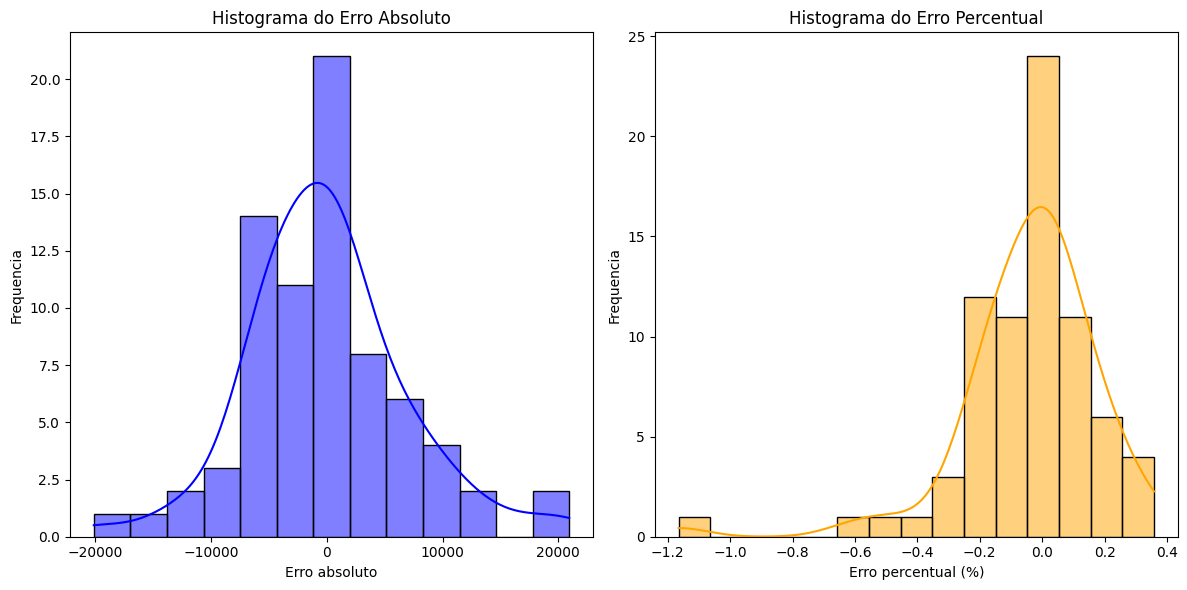

In [108]:
import seaborn as sns

# Plot histograms
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram of errors
sns.histplot(gdf['error'], kde=True, ax=axes[0], color='blue')
axes[0].set_title('Histograma do Erro Absoluto')
axes[0].set_xlabel('Erro absoluto')
axes[0].set_ylabel('Frequencia')

# Histogram of percentage errors
sns.histplot(gdf['error_percentage'], kde=True, ax=axes[1], color='orange')
axes[1].set_title('Histograma do Erro Percentual')
axes[1].set_xlabel('Erro percentual (%)')
axes[1].set_ylabel('Frequencia')

# Show plot
plt.tight_layout()
plt.show()


In [109]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


import numpy as np

# Custom quadratic normalization with flattening near zero
class FlattenedQuadraticNorm(mcolors.Normalize):
    def __init__(self, vmin=None, vmax=None, vcenter=None, alpha=0.5):
        self.vcenter = vcenter
        self.alpha = alpha  # Controls flatness (0 < alpha <= 1)
        super().__init__(vmin, vmax)

    def __call__(self, value, clip=None):
        normalized_value = super().__call__(value, clip)  # Normalize between 0 and 1
        shifted_value = normalized_value - 0.5
        flattened_value = np.sign(shifted_value) * (np.abs(shifted_value) ** self.alpha) + 0.25
        return flattened_value

# Define min, max, and center
vmin = min(gdf['error_percentage'])
vmax = max(gdf['error_percentage'])
vcenter = 0.0
alpha = 1.1  # Adjust for more flatness near zero (0.3 makes it flatter, closer to linear near the center)

# Apply flattened quadratic normalization
flat_quad_norm = FlattenedQuadraticNorm(vmin=vmin, vmax=vmax, vcenter=vcenter, alpha=alpha)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(
    column='error_percentage',
    ax=ax,
    legend=True,
    cmap='bwr',  # Blue-White-Red colormap
    norm=flat_quad_norm,  # Flattened quadratic normalization
    edgecolor='grey',
    linewidth=0.2
)

plt.title(f'Mapa do erro absoluto')
plt.axis('off')
plt.tight_layout()
plt.savefig(f'map_error_perc.png', dpi=300, bbox_inches='tight')
plt.close(fig)  # Close the figure to free up memory